## _Boundary Value Problem_ 1-Dimensi

In [73]:
import numpy as np
import matplotlib.pyplot as plt

1. Persamaan Poisson 1-Dimensi

Persamaan ini didefinisikan dengan $$\frac{\partial^2\Phi}{\partial x^2}=1$$ di mana persamaan ini akan diselesaikan secara numerik dengan pendekatan _Finite Difference Method_.

2. Permasalahan

Persamaan di atas akan diselesaikan dengan menggunakan FD, di mana akan digunakan jumlah node ($N$) sebanyak 101, dengan panjang sistem $x$ sebesar 1000. Sehingga, jarak antar titiknya adalah $h$, yang dihitung sebagai berikut.

In [74]:
x1=0
xm=1000
N=101

h=(xm-x1)/(N-1)

In [75]:
h

10.0

Lalu, dibuat titik dari nol hingga 1000 dengan selisih $h$.

In [76]:
x=np.arange(x1,xm+h,h)

Dari perhitungan di atas, diketahui bahwa pendekatan ini menggunakan selisih antartitik (_stepsize_) sebesar 10. Pada permasalahan ini, kondisi batas yang digunakan adalah $\Phi(x_1)=0$ dan $\Phi(x_N)=0$.

In [77]:
phi1=0
phiN=0

3. Turunan Kedua (Numerik)

Secara numerik, turunan kedua dari sebuah fungsi pada titik $x_i$ ditentukan dengan $$f''(x_i)=\frac{f(x_{i+1})-2f(x_i)+f(x_{i-1})}{h^2}+\mathcal{O}(h^2)$$ di mana $\mathcal{O}(h^2)$ adalah _error_ yang bergantung pada nilai $h^2$.

Sebelumnya, telah dibuat node-node yang digunakan untuk pendekatan nilai turunan kedua. Pada masing-masing node, 
\begin{align}
\nonumber f''(\Phi_1)=&0+(0)\Phi_2+(0)\Phi_3+(0)\Phi_4+(0)\Phi_5+\dots \\
\nonumber f''(\Phi_2)=&(1)\Phi_1+(-2)\Phi_2+(1)\Phi_3+(0)\Phi_4+(0)\Phi_5+\dots \\
\nonumber f''(\Phi_3)=&(0)\Phi_1+(1)\Phi_2+(-2)\Phi_3+(1)\Phi_4+(0)\Phi_5+\dots \\
\nonumber f''(\Phi_4)=&(0)\Phi_1+(0)\Phi_2+(1)\Phi_3+(-2)\Phi_4+(1)\Phi_5+\dots
\end{align}

dan seterusnya, hingga 
\begin{align}
\nonumber f''(\Phi_{100})=&\dots+(0)\Phi_{97}+(0)\Phi_{98}+(1)\Phi_{99}+(-2)\Phi_{100}+(1)\Phi_{101}
\end{align}

Hal ini membentuk sebuah sistem persamaan linear sebagai berikut.

$$X=Ay=\begin{bmatrix}1&0&0&0&\dots&0&0&0&0\\
1&-2&1&0&\dots&0&0&0&0\\
0&1&-2&1&\dots&0&0&0&0\\
\vdots&\vdots&\vdots&\vdots&\ddots&\vdots&\vdots&\vdots&\vdots\\
0&0&0&0&\dots&1&-2&1&0\\
0&0&0&0&\dots&0&1&-2&1\\
1&0&0&0&\dots&0&0&0&1
\end{bmatrix}\begin{bmatrix}\Phi_1\\
\Phi_2\\
\Phi_3\\
\vdots\\
\Phi_{99}\\
\Phi_{100}\\
\Phi_{101}
\end{bmatrix}$$

Sistem kita adalah $Ay=b$, di mana $$b=\begin{bmatrix}0\\
h^2\\
h^2\\
\vdots\\
h^2\\
h^2\\
0\end{bmatrix}$$ Maka, $$\begin{bmatrix}1&0&0&0&\dots&0&0&0&0\\
1&-2&1&0&\dots&0&0&0&0\\
0&1&-2&1&\dots&0&0&0&0\\
\vdots&\vdots&\vdots&\vdots&\ddots&\vdots&\vdots&\vdots&\vdots\\
0&0&0&0&\dots&1&-2&1&0\\
0&0&0&0&\dots&0&1&-2&1\\
1&0&0&0&\dots&0&0&0&1
\end{bmatrix}\begin{bmatrix}\Phi_1\\
\Phi_2\\
\Phi_3\\
\vdots\\
\Phi_{99}\\
\Phi_{100}\\
\Phi_{101}
\end{bmatrix}=b=\begin{bmatrix}0\\
h^2\\
h^2\\
\vdots\\
h^2\\
h^2\\
0\end{bmatrix}$$

Sistem ini akan diselesaikan menggunakan metode Eliminasi Gauss.

4. Penyusunan matriks A

Secara general, matriks $A$ memiliki pola sebagai berikut.

In [78]:
A=np.zeros((N,N))
A[(0,0)]=1
A[(N-1,N-1)]=1

for i in range(1,N-1):
    A[(i,i)]=-2
    A[(i,i+1)]=1
    A[(i,i-1)]=1

5. Penyusunan matriks b

Sedangkan untuk matriks $b$,

In [79]:
b=np.ones((N,1))
b[0]=phi1
b[N-1]=phiN

for i in range(1,N-1):
    b[i]=h**2

6. Metode Eliminasi Gauss

In [80]:
def EGauss(A, b):
    n = A.shape[0]


    for i in range(n):

        pivot = i
        for j in range(i+1, n):
            if abs(A[j, i]) > abs(A[pivot, i]):
                pivot = j

        A[[i, pivot]] = A[[pivot, i]]
        b[[i, pivot]] = b[[pivot, i]]

        for j in range(i+1, n):
            ratio = A[j, i] / A[i, i]
            A[j, i:] -= ratio * A[i, i:]
            b[j] -= ratio * b[i]

    x = np.zeros((n, 1))
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    return x

7. Penyelesaian permasalahan

In [81]:
Solusi=EGauss(A,b)

8. Solusi Analitik

Masalah yang telah diajukan memiliki solusi analitik sebagai berikut. $$y=\frac{1}{2}\left(x^2-1000x\right)$$

In [82]:
def Analitik(x):
    return 1/2*(x**2-1000*x)

9. Penyajian hasil

Pada bagian ini, hasil dari metode FD akan ditunjukkan dengan _scatter_ dan dibandingkan dengan plot hasil analitiknya.

In [86]:
ya=np.zeros(len(x))
for i in range(len(x)):
    ya[i]=Analitik(x[i])

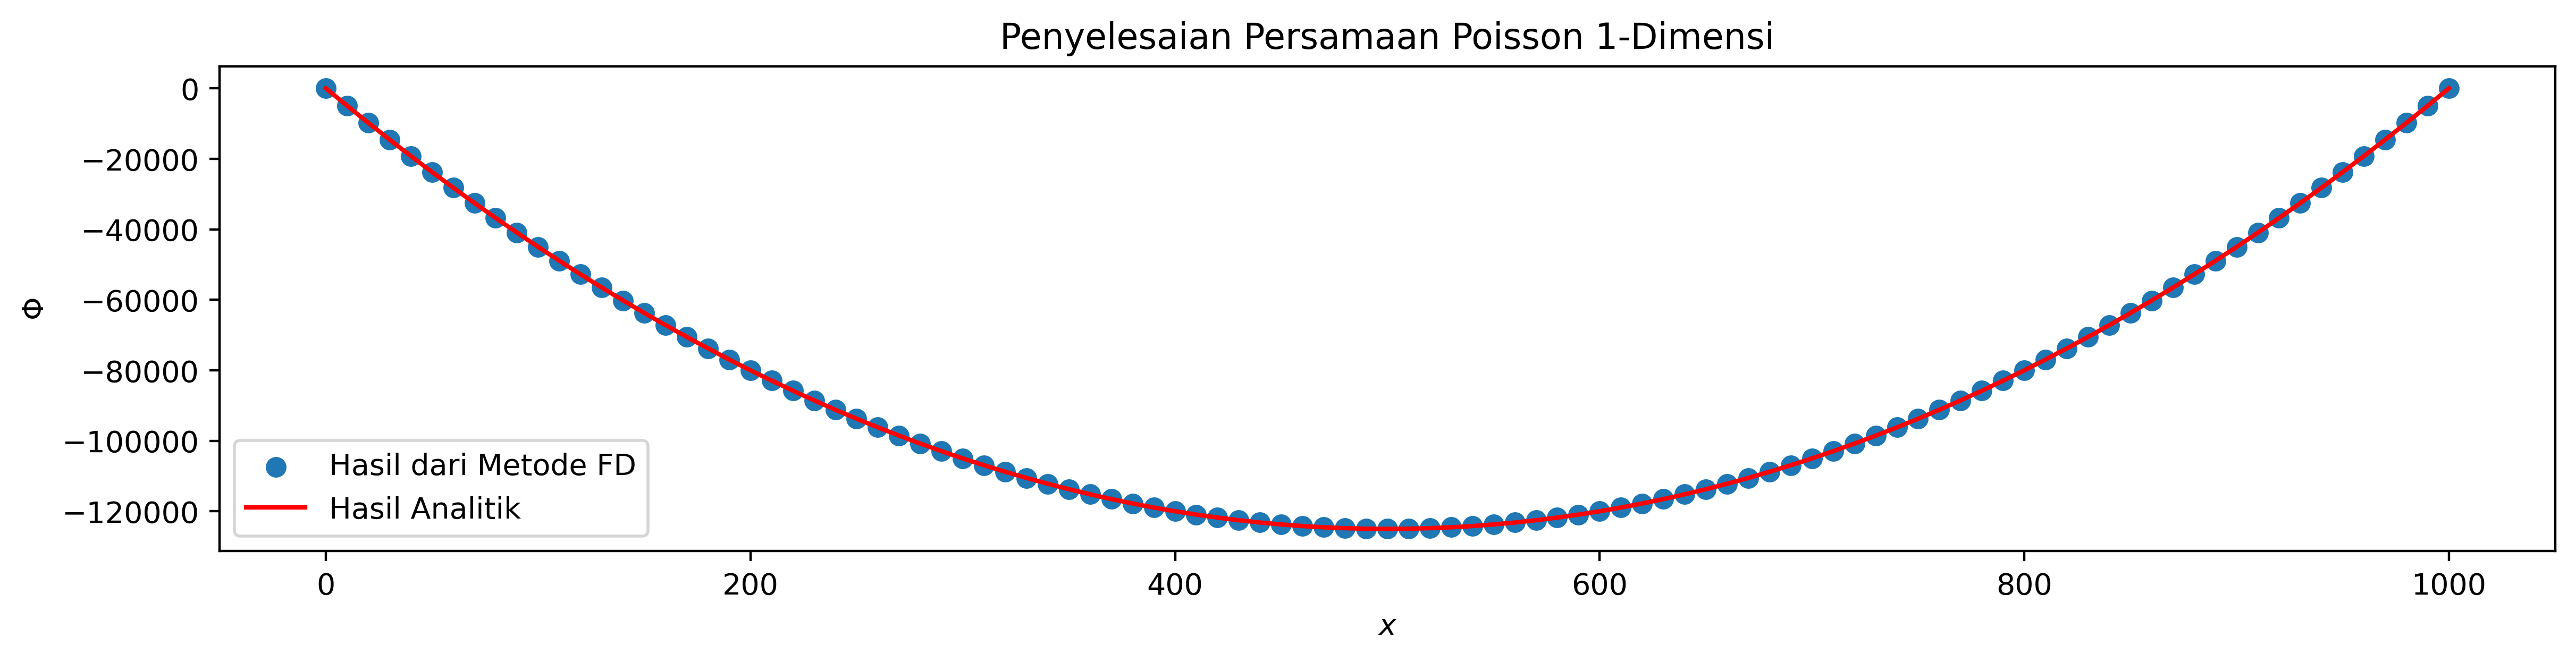

In [88]:
fig,ax=plt.subplots(dpi=400,figsize=(12, 3), layout='constrained')
ax.scatter(x,Solusi,label='Hasil dari Metode FD')
ax.plot(x,ya,'r-',label='Hasil Analitik')
ax.legend()
ax.set_title('Penyelesaian Persamaan Poisson 1-Dimensi')
ax.set_xlabel('$x$')
ax.set_ylabel('$\Phi$')
plt.show()